In [88]:
import numpy as np
import pandas as pd
import json
import os

In [5]:
DATASET_PATH = '/Users/philipbarron/Desktop/GitHub/disease_prediction/disease_prediction/data/'

In [33]:
os.getcwd()

'/Users/philipbarron/Desktop/GitHub/disease_prediction/notebooks'

In [8]:
#read files

train = pd.read_csv(DATASET_PATH+'release_train_patients.csv')
validate = pd.read_csv(DATASET_PATH+'release_validate_patients.csv')
test = pd.read_csv(DATASET_PATH+'release_test_patients.csv')

In [9]:
# Immune and Infectious Diseases

# Infectious Diseases
infectious_diseases = [
    'VIH (Primo-infection)',
    'Coqueluche',
    'Chagas',
    'Tuberculose',
    #'Ebola',
    'Possible influenza ou syndrome virémique typique'
]

# Autoimmune and Inflammatory Conditions
autoimmune_and_inflammatory_conditions = [
    'Lupus érythémateux disséminé (LED)',
    'Sarcoïdose'
]

# Allergic Reactions and Related Conditions
allergic_reactions_and_related_conditions = [
    'Anaphylaxie',
    'Rhinite allergique',
    'Oedème localisé ou généralisé sans atteinte pulmonaire associée'
]

immune_infectious = infectious_diseases + autoimmune_and_inflammatory_conditions + allergic_reactions_and_related_conditions

In [40]:
train_patients = []
validate_patients = []
test_patients = []

for ii in immune_infectious:
    train_patients += [ind for ind in train.PATHOLOGY[train.PATHOLOGY == ii].index.values]
    validate_patients += [ind for ind in validate.PATHOLOGY[validate.PATHOLOGY == ii].index.values]
    test_patients += [ind for ind in test.PATHOLOGY[test.PATHOLOGY == ii].index.values]


In [41]:
# selecting new samples of patients
train_ii = train.iloc[train_patients]
validate_ii = validate.iloc[validate_patients]
test_ii = test.iloc[test_patients]

In [42]:
combined_ii = pd.concat([train_ii, test_ii, validate_ii], ignore_index=True)

combined_ii.reset_index(drop=True, inplace=True)

#Save the combined DataFrame to a new CSV file
combined_ii.to_csv("combined_ii.csv", index=False)

In [22]:
desktop_path = ""

desktop_path = os.path.join(os.environ['HOME'], 'Desktop')

file_path = os.path.join(desktop_path, 'GitHub/disease_prediction/disease_prediction/data/combined_ii.csv')

combined_ii.to_csv(file_path, index=False)

# Evidences

In [23]:
with open(DATASET_PATH+'release_evidences.json') as f:
   pe = json.load(f)
f.close()

possible_evidences = pd.DataFrame.from_dict(pe).T

In [24]:
#possible_evidences.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, fievre to J81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             223 non-null    object
 1   code_question    223 non-null    object
 2   question_fr      223 non-null    object
 3   question_en      223 non-null    object
 4   is_antecedent    223 non-null    object
 5   default_value    223 non-null    object
 6   value_meaning    223 non-null    object
 7   possible-values  223 non-null    object
 8   data_type        223 non-null    object
dtypes: object(9)
memory usage: 17.4+ KB


# Looking at categorical features

For the ones with numbers, leave the columns as it is. For N,O questions, keep binary. For skin rash color make 5 separate columns for 6 options. For travel out of country, make it binary.

In [27]:
possible_evidences[possible_evidences.data_type == 'C']

,name,code_question,question_fr,question_en,is_antecedent,default_value,value_meaning,possible-values,data_type
douleurxx_soudain,douleurxx_soudain,douleurxx,À quelle vitesse la douleur est-elle apparue ?,How fast did the pain appear?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
douleurxx_intens,douleurxx_intens,douleurxx,Quelle est l’intensité de la douleur?,How intense is the pain?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
douleurxx_precis,douleurxx_precis,douleurxx,À quel point la douleur est-elle précisément l...,How precisely is the pain located?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_couleur,lesions_peau_couleur,lesions_peau,De quelle couleur sont les lésions?,What color is the rash?,False,NA,"{'NA': {'fr': 'NA', 'en': 'NA'}, 'foncee': {'f...","[NA, foncee, jaune, pale, rose, rouge]",C
lesions_peau_intens,lesions_peau_intens,lesions_peau,Quelle est l’intensité de la douleur causée pa...,How intense is the pain caused by the rash?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_elevee,lesions_peau_elevee,lesions_peau,La ou les lésions sont-elles surélevées?,Is the rash swollen?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_prurit,lesions_peau_prurit,lesions_peau,Quel est le niveau de la démangeaisons?,How severe is the itching?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_plusqu1cm,lesions_peau_plusqu1cm,lesions_peau,Est-ce que la ou les lésions sont plus grande ...,Is the lesion (or are the lesions) larger than...,False,N,"{'N': {'fr': 'N', 'en': 'N'}, 'O': {'fr': 'O',...","[N, O]",C
lesions_peau_desquame,lesions_peau_desquame,lesions_peau,Est-ce que vos lésions pèlent (morceaux de pea...,Do your lesions peel off?,False,N,"{'N': {'fr': 'N', 'en': 'N'}, 'O': {'fr': 'O',...","[N, O]",C
trav1,trav1,trav1,Avez-vous voyagé dans les 4 dernières semaines?,Have you traveled out of the country in the la...,True,N,"{'N': {'fr': 'N', 'en': 'N'}, 'AfriqN': {'fr':...","[N, AfriqN, AfriqO, AfriqSS, AmerC, AmerN, Ame...",C


In [28]:
#Multichoice columns
possible_evidences[possible_evidences.data_type == 'M']

,name,code_question,question_fr,question_en,is_antecedent,default_value,value_meaning,possible-values,data_type
douleurxx_endroitducorps,douleurxx_endroitducorps,douleurxx,Avez-vous de la douleur quelque part?,Do you feel pain somewhere?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M
douleurxx_irrad,douleurxx_irrad,douleurxx,Est-ce que la douleur se propage vers un autre...,Does the pain radiate to another location?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M
douleurxx_carac,douleurxx_carac,douleurxx,Caractérisez votre douleur:,Characterize your pain:,False,NA,"{'NA': {'fr': 'NA', 'en': 'NA'}, 'déchirante':...","[NA, déchirante, lancinante_/_choc_électrique,...",M
lesions_peau_endroitducorps,lesions_peau_endroitducorps,lesions_peau,À quel endroit est situé chaque lésion?,Where is the affected region located?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M
oedeme_endroitducorps,oedeme_endroitducorps,oedeme,À quel endroit est situé l’enflure?,Where is the swelling located?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M


In [30]:
#possible_evidences[possible_evidences.data_type == "M"]['possible-values'].iloc[0]

In [31]:
body_parts_dict = {
    'head': ['arrière_de_tête', 'dessus_de_tête', 'front', 'menton', 'occiput', 'tempe_D_', 'tempe_G_'],
    'face': ['oreille_D_', 'oreille_G_', 'oeil_D_', 'oeil_G_', 'nez', 'lèvre_inferieure_D_', 'lèvre_supérieure_D_', 'joue_D_', 'joue_G_', 'vermillon_D_', 'vermillon_G_'],
    'mouth': ['bouche', 'dents_inférieures_D_', 'dents_inférieures_G_', 'dents_supérieures_D_', 'dents_supérieures_G_', 'gencive_inférieure', 'gencive_supérieure', 'luette', 'palais', 'sous_la_langue', 'joue_interne_D_', 'joue_interne_G_', 'amygdale_D_', 'amygdale_G_'],
    'neck_throat': ['arrière_du_cou', 'côté_du_cou_D_', 'côté_du_cou_G_', 'cartilage_thyroidien', 'pharynx', 'trachée'],
    'thorax': ['bas_du_thorax', 'côté_du_thorax_D_', 'côté_du_thorax_G_', 'haut_du_thorax', 'thorax_postérieur_D_', 'thorax_postérieur_G_', 'ventre', 'épigastre', 'flanc_D_', 'flanc_G_', 'hypochondre_D_', 'hypochondre_G_'],
    'pelvis_hips': ['aine_D_', 'aine_G_', 'fosse_iliaque_D_', 'fosse_iliaque_G_', 'crête_iliaque_D_', 'crête_iliaque_G_', 'hanche_D_', 'hanche_G_', 'coccyx', 'aile_iliaque_D_', 'aile_iliaque_G_'],
    'upper_limb': ['avant-bras_D_', 'avant-bras_G_', 'biceps_D_', 'biceps_G_', 'coude_D_', 'coude_G_', 'doigt_annulaire__D_', 'doigt_annulaire__G_', 'doigt_auriculaire__D_', 'doigt_auriculaire__G_', 'doigt_index__D_', 'doigt_index__G_', 'doigt_majeur__D_', 'doigt_majeur__G_', 'épaule_D_', 'épaule_G_', 'face_dorsale_du_poignet_D_', 'face_dorsale_du_poignet_G_', 'face_palmaire_de_l_avant-bras_D_', 'face_palmaire_de_l_avant-bras_G_', 'face_palmaire_du_poignet_D_', 'face_palmaire_du_poignet_G_', 'paume_D_', 'paume_G_', 'pouce_D_', 'pouce_G_', 'trapèze_D_', 'trapèze_G_', 'triceps_D_', 'triceps_G_', 'aisselle_D_', 'aisselle_G_'],
    'lower_limb': ['cheville_D_', 'cheville_G_', 'cuisse_D_', 'cuisse_G_', 'genou_D_', 'genou_G_', 'ischio_D_', 'ischio_G_', 'mollet_D_', 'mollet_G_', 'pied_D_', 'pied_G_', 'gros_orteil_D_', 'gros_orteil_G_', 'orteil__1__D_', 'orteil__1__G_', 'orteil__2__D_', 'orteil__2__G_', 'orteil__3__D_', 'orteil__3__G_', 'petit_orteil__4__D_', 'petit_orteil__4__G_', 'talon_D_', 'talon_G_', 'fesse_D_', 'fesse_G_'],
    'back': ['colonne_cervicale', 'colonne_dorsale', 'colonne_lombaire'],
    'organs': ['clitoris', 'hymen', 'paroi_vaginale_D_', 'paroi_vaginale_G_', 'vagin', 'vestibule', 'pénis', 'scrotum', 'testicule_D_', 'testicule_G_', 'loges_renales_D_', 'loges_renales_G_', 'anus'],
}

# Clean Dataset

In [34]:
#from disease_prediction.data import datasets as ds
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 100

In [51]:
train_ii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202290 entries, 1 to 994622
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   AGE                     202290 non-null  int64 
 1   DIFFERENTIAL_DIAGNOSIS  202290 non-null  object
 2   SEX                     202290 non-null  object
 3   PATHOLOGY               202290 non-null  object
 4   EVIDENCES               202290 non-null  object
 5   INITIAL_EVIDENCE        202290 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.8+ MB


In [55]:
from disease_prediction.data import datasets as ds

In [59]:
df = ds.load_datasets(subsets=['train', 'test', 'validate'], directory='/Users/philipbarron/Desktop/GitHub/disease_prediction/disease_prediction/data/ddx-dataset/')

In [61]:
df_train = df['train']
df_test = df['test']
df_validate = df['validate']

In [62]:
df_train.info()

<class 'disease_prediction.data.datasets.DiagDataFrame'>
Index: 203008 entries, 1 to 1023494
Data columns (total 94 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   AGE                     203008 non-null  int64 
 1   SEX                     203008 non-null  object
 2   PATHOLOGY               203008 non-null  object
 3   INITIAL_EVIDENCE        203008 non-null  object
 4   swollen_nodes           203008 non-null  int64 
 5   std                     203008 non-null  int64 
 6   sweating                203008 non-null  int64 
 7   diarrhea                203008 non-null  int64 
 8   pain                    203008 non-null  int64 
 9   pain_char               203008 non-null  object
 10  pain_somewhere          203008 non-null  object
 11  pain_intensity          203008 non-null  int64 
 12  pain_radiate            203008 non-null  object
 13  pain_precise            203008 non-null  int64 
 14  pain_sudden          

In [67]:
df_train = df_train[df_train['PATHOLOGY'] != 'EBOLA']
df_test = df_test[df_test["PATHOLOGY"] != 'EBOLA']
df_validate = df_validate[df_validate["PATHOLOGY"] != 'EBOLA']

In [68]:
#binary and non-binary symptoms

nonbinary = ['AGE',
            'SEX',
            'INITIAL_EVIDENCE',
            'pain_char', 
            'pain_somewhere', 
            'pain_intensity', 
            'pain_radiate',
            'pain_precise',
            'pain_sudden',
            'lesion_color',
            'lesions_peeling',
            'lesion_pain_swollen',
            'lesion_larger_than_1cm',
            'lesion_location',
            'lesion_pain_intense',
            'itching_severity',
            'trav1',
            'swelling_location']
binary_symptoms = [bs for bs in df_train.columns.values if bs not in nonbinary]

In [73]:
df_train.drop(columns=['lesions_peeling', 'pain_radiate'], inplace=True)
df_test.drop(columns=['lesions_peeling', 'pain_radiate'], inplace=True)
df_validate.drop(columns=['lesions_peeling', 'pain_radiate'], inplace=True)

In [75]:
## one hot encoding

columns = list(df_test.columns)

numerical = []
categorical = []

for col in columns:

    if df_train[col].dtype == 'int64':
        numerical.append(col)

    elif df_train[col].dtype == 'object':
        categorical.append(col)

categorical.remove('PATHOLOGY')
categorical.remove('pain_somewhere')
categorical.remove('lesion_location')

## one hot encoding

columns = list(df_validate.columns)

numerical = []
categorical = []

for col in columns:

    if df_train[col].dtype == 'int64':
        numerical.append(col)

    elif df_train[col].dtype == 'object':
        categorical.append(col)

categorical.remove('PATHOLOGY')
categorical.remove('pain_somewhere')
categorical.remove('lesion_location')

In [77]:
print('categorical columns')
categorical


categorical columns


['SEX',
 'INITIAL_EVIDENCE',
 'pain_char',
 'lesion_color',
 'lesion_larger_than_1cm',
 'trav1',
 'swelling_location']

In [78]:
df_combined = pd.concat([df_train, df_test, df_validate], ignore_index=True)

df_combined.reset_index(drop=True, inplace=True)

#Save the combined DataFrame to a new CSV file
df_combined.to_csv("df_combined.csv", index=False)

In [98]:
#Hot encoding
df_combined = pd.get_dummies(df_combined, 
                         columns=categorical, 
                         dtype=int)

KeyError: "None of [Index(['SEX', 'INITIAL_EVIDENCE', 'pain_char', 'lesion_color',\n       'lesion_larger_than_1cm', 'trav1', 'swelling_location'],\n      dtype='object')] are in the [columns]"

In [82]:

## pain_somewhere, lesion_location and swelling_location -> Y or N to simplify

df_combined['lesion_location'] = (df_combined['lesion_location'] != 'nowhere').astype(int)
df_combined['pain_somewhere'] = (df_combined['pain_somewhere'] != 'nowhere').astype(int)

# Segmented train-test-validation split 

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split

#feature columns
X = df_combined.drop(columns = ['PATHOLOGY'])

#target, what we want to predict
y = df_combined['PATHOLOGY']


#80% train, 20% temporary (will be 10% test, 10% validation)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=52, stratify=y)

#Split the temporary to 10% test, 10% validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=52, stratify=y_temp)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')


Training set: (203276, 164), (203276,)
Validation set: (25410, 164), (25410,)
Test set: (25410, 164), (25410,)


# Random Forest Model

In [89]:
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import time

In [90]:
# Hyper parameters
max_depths = [5,10,20,30]
n_trees = [10,50,100,200,300]

In [91]:
ti = time.time()

grid_cv = GridSearchCV(RandomForestClassifier(), # first put the model object here
                          param_grid = {'max_depth':max_depths, # place the grid values for max_depth and
                                        'n_estimators':n_trees}, # and n_estimators here
                          scoring = 'neg_log_loss', # put the metric we are trying to optimize here as a string
                          cv = 5,
                          n_jobs=-1) 

grid_cv.fit(X_train, y_train)

tf= time.time()
print("the total time of gridsearchcv is: ", tf-ti)

/Users/philipbarron/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/philipbarron/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/philipbarron/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


the total time of gridsearchcv is:  1717.766058921814


In [92]:
grid_cv.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [93]:
emg_clf = grid_cv.best_estimator_
y_pred=emg_clf.predict(X_test)
y_pred_proba = emg_clf.predict_proba(X_test)
print(accuracy_score(y_test.values.ravel(), y_pred))

0.6022038567493113


In [94]:
log_loss(y_test.values, y_pred_proba)

1.0140121491559702

## Plot the confusion matrix

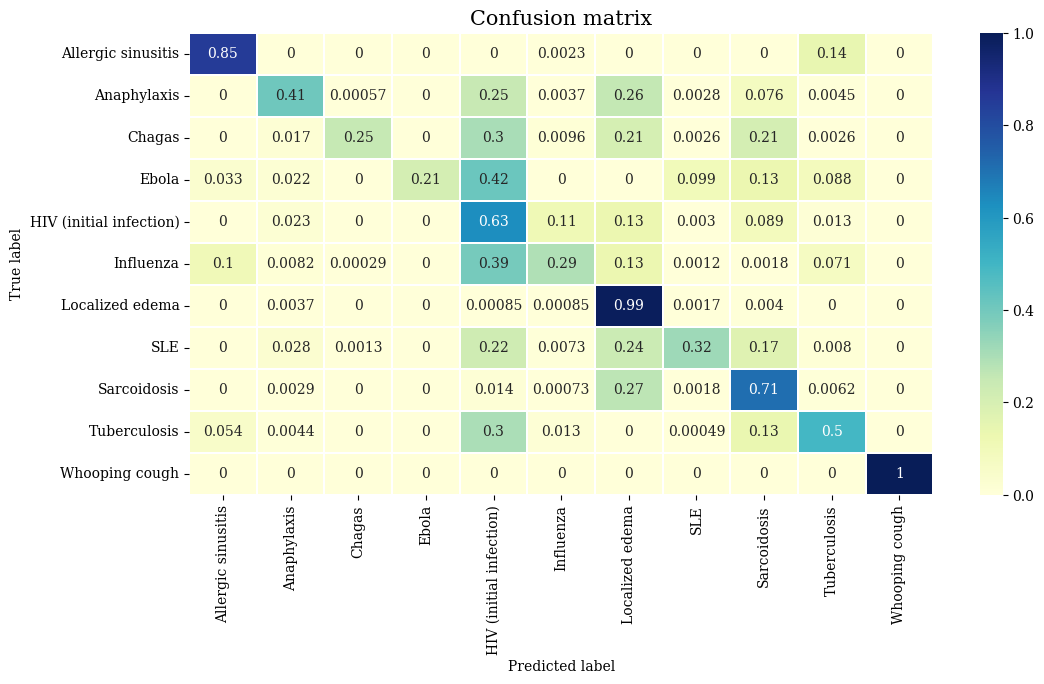

In [95]:
# %% Confusion matrix
import seaborn as sns
confusionmatrix = confusion_matrix(y_test, y_pred, normalize = 'true')

sns.heatmap(confusionmatrix, annot=True, xticklabels = emg_clf.classes_, yticklabels=emg_clf.classes_, linewidths = 0.1, cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [96]:
importance_df = pd.DataFrame({'feature':X_train.columns,
                                'importance_score':grid_cv.best_estimator_.feature_importances_})

importance_df= importance_df.sort_values('importance_score',ascending=False)

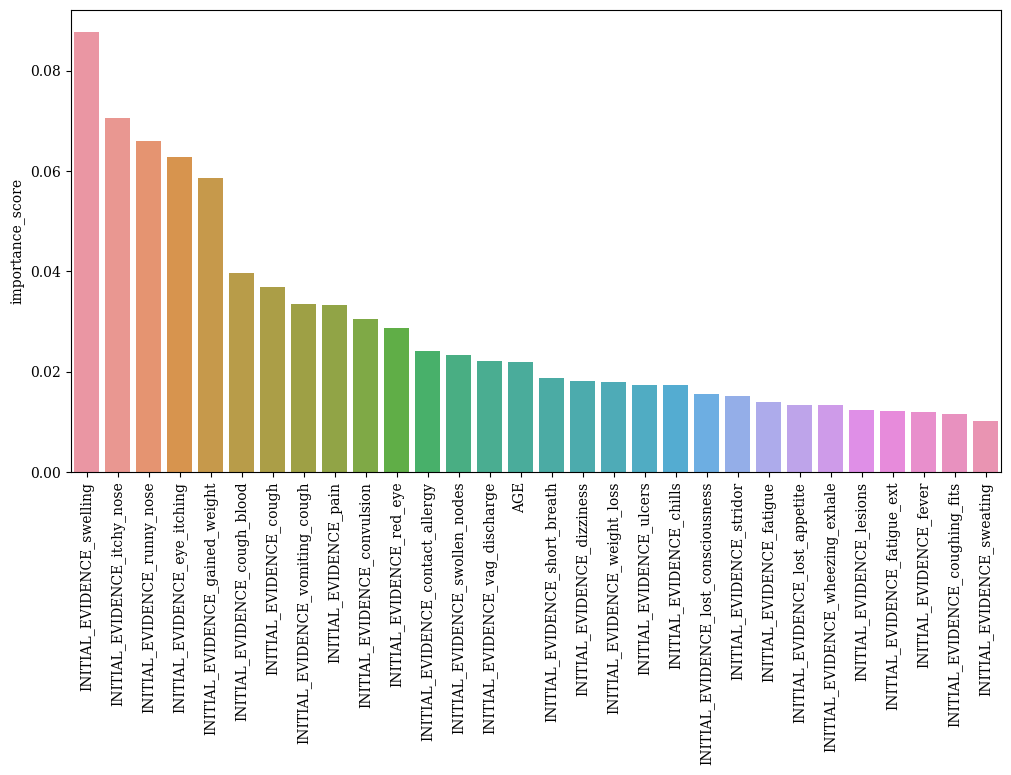

In [97]:
top_importance = importance_df.loc[importance_df['importance_score']>=0.01]
b = sns.barplot(top_importance, x = X_test.columns[top_importance.index], y = top_importance['importance_score'])
b.tick_params(axis='x',rotation=90)

In [100]:
df_combined["PATHOLOGY"].unique()

array(['HIV (initial infection)', 'Allergic sinusitis', 'Anaphylaxis',
       'Tuberculosis', 'SLE', 'Chagas', 'Localized edema', 'Sarcoidosis',
       'Influenza', 'Whooping cough', 'Ebola'], dtype=object)